In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
from scipy.signal import savgol_filter

In [2]:

HaloA_Ionisation = {0:0.0,
                    503:0.23,
                    732:3.1,
                    998:18,
                    1107:21,
                    1282:33,
                    1412:39,
                    1500:40,
                    1609:44,
                    1718:39,
                    1783:36,
                    1892:46,
                    2023:46}

HaloA_Recombination = {0: 1e-8,
                       503:6.2e-6,
                    732:6.4e-7,
                    998:4.3e-5,
                    1107:7.3e-5,
                    1282:2.8e-5,
                    1412:6.9e-6,
                    1500:9.4e-6,
                    1609:3.6e-6,
                    1718:1.0e-5,
                    1783:3.3e-6,
                    1892:5.7e-6,
                    2023:5.5e-6}

HaloB_Ionisation = {0: 0.0,
                    469: 0.14,
                    732:12,
                    994: 70,
                    1103:93,
                    1354:99}

HaloB_Recombination = {0.0: 2e-5, 
                       469: 2.9e-5,
                       732:1.7e-3,
                       994: 0.52,
                       1103:6.1,
                       1354:63}

HaloA_times = HaloA_Ionisation.keys()
print("HaloA_times = ", list(HaloA_times))
print("HaloA_vals = ", HaloA_Ionisation.values())

HaloA_times =  [0, 503, 732, 998, 1107, 1282, 1412, 1500, 1609, 1718, 1783, 1892, 2023]
HaloA_vals =  dict_values([0.0, 0.23, 3.1, 18, 21, 33, 39, 40, 44, 39, 36, 46, 46])


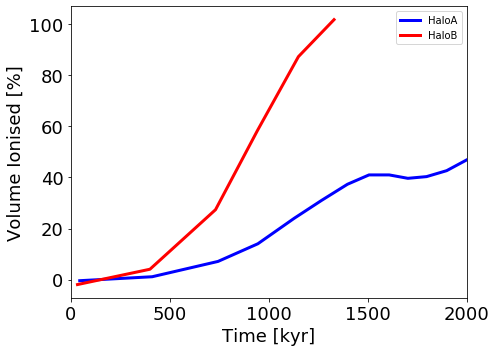

In [3]:
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(112)
haloAx = savgol_filter(list(HaloA_Ionisation.keys()), 3, 1)
haloAy = savgol_filter(list(HaloA_Ionisation.values()), 3, 1)
haloBx = savgol_filter(list(HaloB_Ionisation.keys()), 3, 1)
haloBy = savgol_filter(list(HaloB_Ionisation.values()), 3, 1)
ax1.plot(haloAx, haloAy, label='HaloA', lw=3, color='b')
ax1.plot(haloBx, haloBy, label='HaloB', lw=3, color='r')
ax1.set_xlabel("Time [kyr]", fontsize=18)
ax1.set_ylabel("Volume Ionised [%]", fontsize=18)
ax1.set_xlim(0.0, 2000)
ax1.tick_params(labelsize=18)
ax1.legend()
fig.tight_layout()
fig.savefig("Ionisation.pdf")


HaloA_times =  [0, 503, 732, 998, 1107, 1282, 1412, 1500, 1609, 1718, 1783, 1892, 2023]
HaloA_vals =  dict_values([1e-08, 6.2e-06, 6.4e-07, 4.3e-05, 7.3e-05, 2.8e-05, 6.9e-06, 9.4e-06, 3.6e-06, 1e-05, 3.3e-06, 5.7e-06, 5.5e-06])


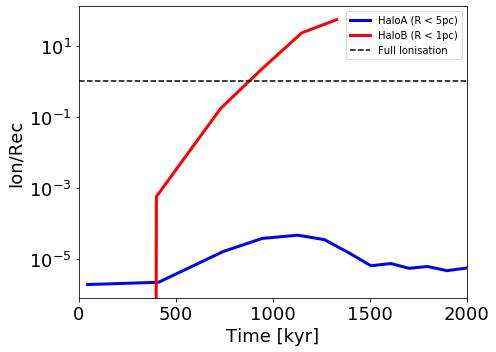

In [4]:
print("HaloA_times = ", list(HaloA_times))
print("HaloA_vals = ", HaloA_Recombination.values())
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
haloAx = savgol_filter(list(HaloA_Recombination.keys()), 3, 1)
haloAy = savgol_filter(list(HaloA_Recombination.values()), 3, 1)
haloBx = savgol_filter(list(HaloB_Recombination.keys()), 3, 1)
haloBy = savgol_filter(list(HaloB_Recombination.values()), 3, 1)
ax1.semilogy(haloAx, haloAy, label='HaloA (R < 5pc)', lw=3, color='b')
ax1.semilogy(haloBx, haloBy, label='HaloB (R < 1pc)', lw=3, color='r')
ax1.axhline(y=1.0, ls='dashed',c='k',label='Full Ionisation')
ax1.set_xlabel("Time [kyr]", fontsize=18)
ax1.set_ylabel("Ion/Rec", fontsize=18)
ax1.set_xlim(0.0, 2000)
#ax1.set_ylim(1e-7, 1e1)
ax1.tick_params(labelsize=18)
ax1.legend()
fig.tight_layout()
fig.savefig("recombination.pdf")